Random Search in the Hyperparameter Space for the best PGMM Structure
---

In this code we aim to implement and test the following:
* Random Search for the Hyperparameters of the best PGMM Structure.
* Grid Search for the Hyperparameters of the best PGMM Structure.
* Compare result and training time for both methods above.
* Initialy study for a artificil low-dimension data set, as a proof of concept.
* Prepare the ground and familirize of the API for the application on a real-data situation.

In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap 
from scipy import linalg
from scipy.stats import randint
from operator import itemgetter

from time import time

from sklearn.mixture import PGMM
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_blobs

In [2]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [3]:
# Create and display data set
n_samples = 5000
n_features = 2
centers = 3

X, y = make_blobs(n_samples=n_samples, 
               n_features=n_features, 
               centers=centers)
print 'Created {} samples wih {} features and {} centers.'.format(X.shape[0], X.shape[1], centers)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)
print 'The data set was divided into {} training samples and {} testing samples.'.format(X_train.shape[0], X_val.shape[0])

Created 5000 samples wih 2 features and 3 centers.
The data set was divided into 3750 training samples and 1250 testing samples.


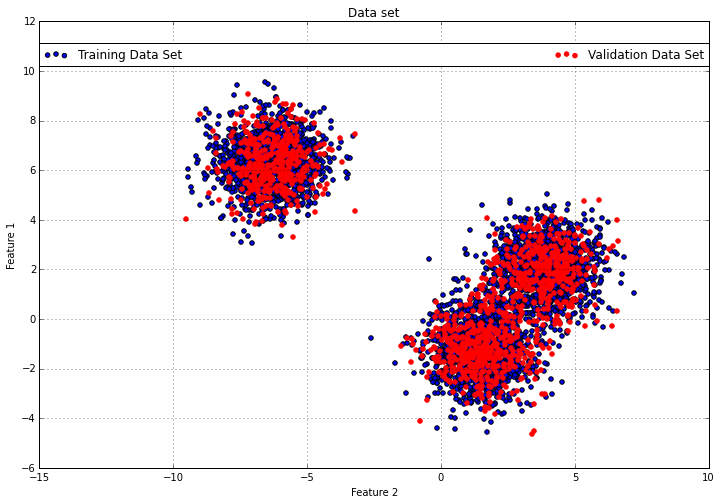

In [4]:
# If the data set has is bi-dimensional, scatter plot it
if n_features == 2:
    plt.figure(figsize=(12, 8))
    plt.scatter(X_train[:, 0], X_train[:, 1])
    plt.scatter(X_val[:, 0], X_val[:, 1], color='red')
    plt.legend(['Training Data Set', 'Validation Data Set'], bbox_to_anchor=(0., 0.9, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    plt.title('Data set')
    plt.ylabel('Feature 1')
    plt.xlabel('Feature 2')
    plt.grid()
    plt.show()
    

Grid Search
---

In [5]:
# Execute GridSearch
# Set the parameters by cross-validation
min_comp = 1
max_comp = 8
param_grid = [{'n_components': np.arange(min_comp, max_comp + 1),
               'n_pc' : np.arange(n_features - 1) + 1,
               'verbose' : [0]}]
def myScore(model, X):
    scores = model.score(X)
    return np.sum(scores)
# Run grid search
grid_search = GridSearchCV(PGMM(),
                           param_grid=param_grid,
                           scoring=myScore,
                           cv=5,
                           verbose=2)
grid_start = time()
grid_search.fit(X_train)
grid_end = time()
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (grid_end - grid_start, len(grid_search.grid_scores_)))

grid_best = grid_search.best_estimator_
print 'The best found model was: '
print grid_best

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_pc=1, n_components=1, verbose=2 ...............................
Expectation-maximization algorithm started.
Initialization 1
	Means have been initialized.
	Weights have been initialized.
	Noise value have been initialized.
	Principal sub-space have been initialized.
	EM iteration 1
		EM iteration 1 took 0.00469s
	EM iteration 2
		Change: 0.0
		EM algorithm converged.
	Better parameters were found.
	Initialization 1 took 0.06151s
[CV] ...................... n_pc=1, n_components=1, verbose=2 -   0.1s
[CV] n_pc=1, n_components=1, verbose=2 ...............................
Expectation-maximization algorithm started.
Initialization 1
	Means have been initialized.
	Weights have been initialized.
	Noise value have been initialized.
	Principal sub-space have been initialized.
	EM iteration 1
		EM iteration 1 took 0.00302s
	EM iteration 2
		Change: 1.7763568394e-15
		EM algorithm converged.
	Better parameters were found.
	Initial

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   21.4s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.4s finished


Model with rank: 1
Mean validation score: -2943.208 (std: 19.160)
Parameters: {'n_pc': 1, 'n_components': 7, 'verbose': 2}

Model with rank: 2
Mean validation score: -2943.412 (std: 19.088)
Parameters: {'n_pc': 1, 'n_components': 8, 'verbose': 2}

Model with rank: 3
Mean validation score: -2943.768 (std: 19.171)
Parameters: {'n_pc': 1, 'n_components': 5, 'verbose': 2}

Model with rank: 4
Mean validation score: -2943.980 (std: 19.353)
Parameters: {'n_pc': 1, 'n_components': 4, 'verbose': 2}

Model with rank: 5
Mean validation score: -2944.066 (std: 19.170)
Parameters: {'n_pc': 1, 'n_components': 6, 'verbose': 2}

Model with rank: 6
Mean validation score: -2958.354 (std: 21.605)
Parameters: {'n_pc': 1, 'n_components': 3, 'verbose': 2}

Model with rank: 7
Mean validation score: -3176.219 (std: 26.524)
Parameters: {'n_pc': 1, 'n_components': 2, 'verbose': 2}

Model with rank: 8
Mean validation score: -4589.617 (std: 40.324)
Parameters: {'n_pc': 1, 'n_components': 1, 'verbose': 2}



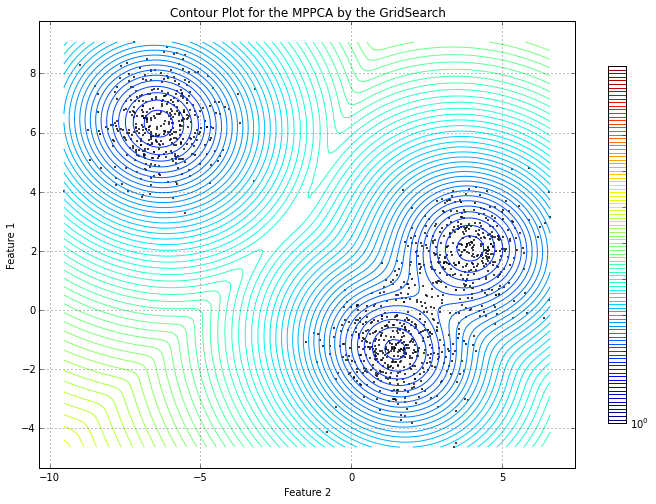

In [6]:
report(grid_search.grid_scores_, n_top=len(grid_search.grid_scores_))
# If the data set has is bi-dimensional, contour plot the result
if n_features == 2:
    x_mesh = np.linspace(np.min(X_val[:,0]), np.max(X_val[:,0]), 100)
    y_mesh = np.linspace(np.min(X_val[:,1]), np.max(X_val[:,1]), 100)
    X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
    XX = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T
    Z_mesh = -grid_best.score_samples(XX)[0]
    Z_mesh = Z_mesh.reshape(X_mesh.shape)

    plt.figure(figsize=(12, 8))
    CS = plt.contour(X_mesh, Y_mesh, Z_mesh, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 100))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(X_val[:, 0], X_val[:, 1], .8)
    plt.title('Contour Plot for the MPPCA by the GridSearch')
    plt.axis('tight')
    plt.ylabel('Feature 1')
    plt.xlabel('Feature 2')
    plt.grid()        
    plt.show()

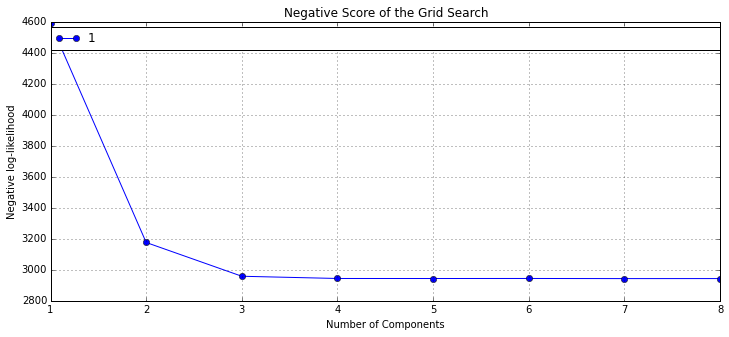

In [7]:
# Score analysis for the trained models        
grid_scores = grid_search.grid_scores_
# Analyse models based on the validation data set
num_comps = np.arange(min_comp, max_comp + 1)
n_pcs = np.arange(n_features - 1) + 1
grid_search_neg_sum_loglike = np.zeros((len(num_comps), len(n_pcs)))

for score in grid_scores:
    n_pc_idx = score.parameters.get('n_pc') - 1
    n_comp_idx = score.parameters.get('n_components') - 1
    grid_search_neg_sum_loglike[n_comp_idx, n_pc_idx] = -score.mean_validation_score
        
plt.figure(figsize=(12, 5))
plt.plot(num_comps, grid_search_neg_sum_loglike, marker='o')
plt.legend(n_pcs, bbox_to_anchor=(0., 0.9, 1., .102), loc=3,
           ncol=6, mode="expand", borderaxespad=0.)
plt.title('Negative Score of the Grid Search')
plt.ylabel('Negative log-likelihood')
plt.xlabel('Number of Components')
plt.grid()
plt.show()

Random Search
---

In [8]:
# Execute RandomSearch
# Set the parameters by cross-validation
# run randomized search
n_iter_search = 5
# specify parameters and distributions to sample from
param_dist = {'n_components': randint(min_comp, max_comp),
              'n_pc' : randint(1, n_features),
              'verbose': [0]}

# Run random search
random_search = RandomizedSearchCV(PGMM(),
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring=myScore,
                                   cv=5,
                                   verbose=2)
random_start = time()
random_search.fit(X_train)
random_end = time()
print("RandomSearchCV took %.2f seconds for %d candidate parameter settings."
      % (random_end - random_start, len(random_search.grid_scores_)))

random_best = random_search.best_estimator_
print 'The best found model was: '
print random_best

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_pc=1, n_components=1, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=1, verbose=0 -   0.1s
[CV] n_pc=1, n_components=1, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=1, verbose=0 -   0.1s
[CV] n_pc=1, n_components=1, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=1, verbose=0 -   0.1s
[CV] n_pc=1, n_components=1, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=1, verbose=0 -   0.1s
[CV] n_pc=1, n_components=1, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=1, verbose=0 -   0.1s
[CV] n_pc=1, n_components=7, verbose=0 ...............................
[CV] ...................... n_pc=1, n_components=7, verbose=0 -   0.9s
[CV] n_pc=1, n_components=7, verbose=0 ...............................
[CV] ............

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.1s finished


Model with rank: 1
Mean validation score: -2943.340 (std: 19.260)
Parameters: {'n_pc': 1, 'n_components': 7, 'verbose': 0}

Model with rank: 2
Mean validation score: -2943.608 (std: 19.168)
Parameters: {'n_pc': 1, 'n_components': 7, 'verbose': 0}

Model with rank: 3
Mean validation score: -3176.219 (std: 26.524)
Parameters: {'n_pc': 1, 'n_components': 2, 'verbose': 0}

Model with rank: 4
Mean validation score: -3176.219 (std: 26.524)
Parameters: {'n_pc': 1, 'n_components': 2, 'verbose': 0}

Model with rank: 5
Mean validation score: -4589.617 (std: 40.324)
Parameters: {'n_pc': 1, 'n_components': 1, 'verbose': 0}



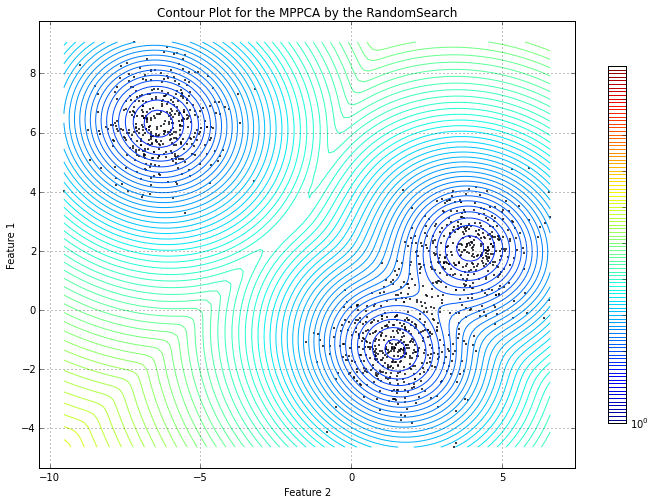

In [9]:
report(random_search.grid_scores_, n_top=len(random_search.grid_scores_))
# If the data set has is bi-dimensional, contour plot the result
if n_features == 2:
    x_mesh = np.linspace(np.min(X_val[:,0]), np.max(X_val[:,0]), 100)
    y_mesh = np.linspace(np.min(X_val[:,1]), np.max(X_val[:,1]), 100)
    X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
    XX = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T
    Z_mesh = -random_best.score_samples(XX)[0]
    Z_mesh = Z_mesh.reshape(X_mesh.shape)

    plt.figure(figsize=(12, 8))
    CS = plt.contour(X_mesh, Y_mesh, Z_mesh, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 100))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(X_val[:, 0], X_val[:, 1], .8)
    plt.title('Contour Plot for the MPPCA by the RandomSearch')
    plt.axis('tight')
    plt.ylabel('Feature 1')
    plt.xlabel('Feature 2')
    plt.grid()        
    plt.show()

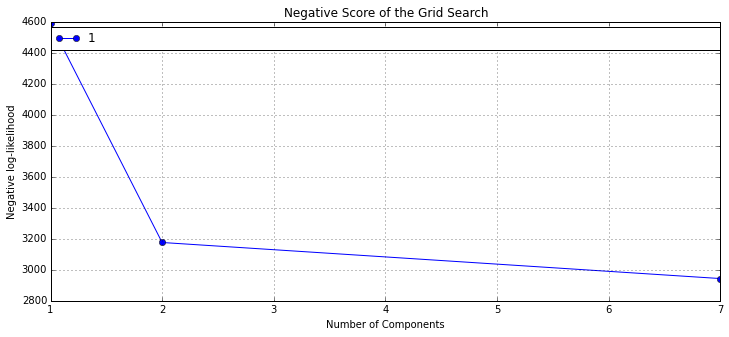

In [10]:
# Score analysis for the trained models        
random_scores = random_search.grid_scores_
# Analyse models based on the validation data set
num_comps = np.arange(min_comp, max_comp + 1)
n_pcs = np.arange(n_features - 1) + 1
random_search_neg_sum_loglike = np.full((len(num_comps), len(n_pcs)), np.nan)

for score in random_scores:
    n_pc_idx = score.parameters.get('n_pc') - 1
    n_comp_idx = score.parameters.get('n_components') - 1
    random_search_neg_sum_loglike[n_comp_idx, n_pc_idx] = -score.mean_validation_score
        
colors = cm.rainbow(np.linspace(0, 1, len(random_search_neg_sum_loglike)))
plt.figure(figsize=(12, 5))
plt.rc('axes', color_cycle=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
for y, c in zip(random_search_neg_sum_loglike.T, colors):
    mask = np.isnan(y)
    plt.plot(num_comps[~mask], y[~mask], marker='o')
plt.legend(n_pcs, bbox_to_anchor=(0., 0.9, 1., .102), loc=3,
           ncol=6, mode="expand", borderaxespad=0.)
plt.title('Negative Score of the Grid Search')
plt.ylabel('Negative log-likelihood')
plt.xlabel('Number of Components')
plt.grid()
plt.show()